# Case Study 1: M5 Forecasting-Accuracy(Walmart Sales Prediction)

# Exploratory Data Analysis(EDA)

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content'

In [ ]:
!kaggle competitions download -c m5-forecasting-accuracy

 63% 9.00M/14.2M [00:00<00:00, 28.6MB/s]
100% 14.2M/14.2M [00:00<00:00, 36.0MB/s]
 58% 9.00M/15.5M [00:00<00:00, 25.4MB/s]
100% 15.5M/15.5M [00:00<00:00, 39.2MB/s]
  0% 0.00/101k [00:00<?, ?B/s]
100% 101k/101k [00:00<00:00, 99.4MB/s]
 57% 9.00M/15.8M [00:00<00:00, 31.5MB/s]
100% 15.8M/15.8M [00:00<00:00, 45.4MB/s]
  0% 0.00/163k [00:00<?, ?B/s]
100% 163k/163k [00:00<00:00, 176MB/s]


## Extracting all the csv files

In [ ]:
!unzip -q sales_train_evaluation.csv.zip
!unzip -q sell_prices.csv.zip
!unzip -q sample_submission.csv.zip
!unzip -q sales_train_validation.csv.zip

## Importing required packages for EDA

In [1]:
import plotly.express as px
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

## 1. sales_train_evaluation.csv and sales_train_validation.csv

In [2]:
sales = pd.read_csv("sales_train_evaluation.csv")
sales1 = pd.read_csv("sales_train_validation.csv")

In [5]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1947 entries, id to d_1941
dtypes: int64(1941), object(6)
memory usage: 452.9+ MB


## Observation
* There are 30490 rows with 1947 columns out of which 1941 columns are of type 'int' and 6 columns are of type 'object'(str)

In [6]:
#Display first 5 rows of sales_train_evaluation.csv
sales.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,2,1,0,0,2,1,0


In [7]:
#Display first 5 rows of sales_train_validation.csv
sales1.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


## Both the csv files contain similar details. Only difference is evaluation data contains sales data of 1941 days and validation data contains sales data of 1913 days.

In [8]:
print("There are "+str(sales.isna().sum().sum())+" null/Nan values in the dataframe")

There are 0 null/Nan values in the dataframe


In [9]:
print("total Products :",len(set(sales['item_id'])))
print("total categories :",len(set(sales['cat_id'])))
print("total departements(sub-categories) :",len(set(sales['dept_id'])))
print("total states :",len(set(sales['state_id'])))
print("total stores :",len(set(sales['store_id'])))

total Products : 3049
total categories : 3
total departements(sub-categories) : 7
total states : 3
total stores : 10


## There are 3049 unique products on 3 categories, 7 departments(sub-categories) and 10 stores from 3 states.

In [10]:
print("PRODUCT CATEGORIES :",set(sales['cat_id']))
print("PRODUCT SUB-CATEGORIES :",set(sales['dept_id']))
print("-----------------------------------------------------")
print("States :",set(sales['state_id']))
print("Stores :",set(sales['store_id']))

PRODUCT CATEGORIES : {'HOBBIES', 'FOODS', 'HOUSEHOLD'}
PRODUCT SUB-CATEGORIES : {'FOODS_3', 'HOUSEHOLD_2', 'FOODS_1', 'HOBBIES_2', 'FOODS_2', 'HOBBIES_1', 'HOUSEHOLD_1'}
-----------------------------------------------------
States : {'WI', 'CA', 'TX'}
Stores : {'TX_3', 'WI_2', 'TX_1', 'WI_1', 'CA_2', 'WI_3', 'CA_1', 'CA_3', 'CA_4', 'TX_2'}



* 'CA' --> California
* 'TX' --> Texas
* 'WI' --> Wisconsin
* CA_1,CA_2,CA_3,CA_4 are stores located in California(CA) , similarly TX_1,TX_2,TX_3 and WI_1,WI_2,WI_3 are sthe stores located in Texas(TX) and Wisconsin(WI) respectively


## Average population from year 2012 to 2016
https://www.google.com/search?sxsrf=ALeKk03yJnKWtQTnTIBc20f0BOZW6YAbZg%3A1612625770892&ei=arceYObrNbeU4-EPrfqHCA&q=population+in+texas&oq=population+in+texas&gs_lcp=CgZwc3ktYWIQAzICCAAyAggAMgcIABAUEIcCMgIIADICCAAyAggAMgIIADICCAAyAggAMgIIADoHCAAQsAMQQzoJCAAQsAMQChBDOgQIIxAnOgQIABBDOgUIABCxAzoFCAAQkQJQvlxYsHtg6YABaAFwAngAgAG1AogBkRaSAQgwLjE0LjEuMZgBAKABAaoBB2d3cy13aXrIAQrAAQE&sclient=psy-ab&ved=0ahUKEwjmyOqRy9XuAhU3yjgGHS39AQEQ4dUDCA0&uact=5
https://www.google.com/search?sxsrf=ALeKk03c5qHtJLvtAF1b-b4lVZFWAiFCZg%3A1612625789122&ei=fbceYKnsBs2X4-EPwLacyAM&q=population+in+Wisconsin&oq=population+in+Wisconsin&gs_lcp=CgZwc3ktYWIQAzICCAAyAggAMgIIADICCAAyAggAMgIIADICCAAyBQgAEIYDMgUIABCGAzoHCAAQsAMQQzoJCAAQsAMQChBDOgQIIxAnOgcIABAUEIcCOgQIABBDOgUIABCxAzoFCAAQkQJQsZQDWNjBBGCdxgRoBHACeACAAckBiAGWDpIBBTAuOS4xmAEAoAEBoAECqgEHZ3dzLXdpesgBCsABAQ&sclient=psy-ab&ved=0ahUKEwjpnsOay9XuAhXNyzgGHUAbBzkQ4dUDCA0&uact=5
* California --> 3.9 crores
* Texas --> 2.75 crores
* Wisconsin --> 57.6 Lakhs

In [11]:
categories = list(set(sales['cat_id']))
print("Among 30490 products, the categories are ",categories)
sub_categories=list(set(sales['dept_id']))
for n,cat_name in enumerate(categories,1):
  d = sales[sales['cat_id']==cat_name]
  a=d['cat_id'].value_counts()[0]
  print(n,cat_name,"products",a)
  for sub_cat_name in sub_categories:
    if cat_name in sub_cat_name:
      t = d[d['dept_id']==sub_cat_name]
      ji=t['dept_id'].value_counts()[0]
      print("-->",sub_cat_name,ji)
  print("-----------------------")

Among 30490 products, the categories are  ['HOBBIES', 'FOODS', 'HOUSEHOLD']
1 HOBBIES products 5650
--> HOBBIES_2 1490
--> HOBBIES_1 4160
-----------------------
2 FOODS products 14370
--> FOODS_3 8230
--> FOODS_1 2160
--> FOODS_2 3980
-----------------------
3 HOUSEHOLD products 10470
--> HOUSEHOLD_2 5150
--> HOUSEHOLD_1 5320
-----------------------


In [12]:
a=sales['item_id'].value_counts()
a.mean()
#set(a)

10.0

In [13]:
sales[sales['item_id']=='FOODS_1_001']

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
1612,FOODS_1_001_CA_1_evaluation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,3,0,0,1,...,2,3,1,0,0,0,1,0,0,0
4661,FOODS_1_001_CA_2_evaluation,FOODS_1_001,FOODS_1,FOODS,CA_2,CA,2,0,0,0,...,1,0,0,1,1,0,0,1,2,0
7710,FOODS_1_001_CA_3_evaluation,FOODS_1_001,FOODS_1,FOODS,CA_3,CA,1,2,1,1,...,1,2,2,0,0,1,0,3,2,2
10759,FOODS_1_001_CA_4_evaluation,FOODS_1_001,FOODS_1,FOODS,CA_4,CA,0,1,1,1,...,1,0,0,0,0,1,1,0,0,0
13808,FOODS_1_001_TX_1_evaluation,FOODS_1_001,FOODS_1,FOODS,TX_1,TX,0,1,1,0,...,1,1,1,1,5,0,2,2,0,2
16857,FOODS_1_001_TX_2_evaluation,FOODS_1_001,FOODS_1,FOODS,TX_2,TX,0,0,1,2,...,0,0,1,0,0,1,0,0,0,1
19906,FOODS_1_001_TX_3_evaluation,FOODS_1_001,FOODS_1,FOODS,TX_3,TX,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
22955,FOODS_1_001_WI_1_evaluation,FOODS_1_001,FOODS_1,FOODS,WI_1,WI,0,2,0,1,...,0,0,1,0,0,0,0,0,1,1
26004,FOODS_1_001_WI_2_evaluation,FOODS_1_001,FOODS_1,FOODS,WI_2,WI,0,0,0,0,...,0,2,1,1,1,4,0,0,0,3
29053,FOODS_1_001_WI_3_evaluation,FOODS_1_001,FOODS_1,FOODS,WI_3,WI,0,0,0,0,...,1,0,1,0,0,0,1,0,0,0


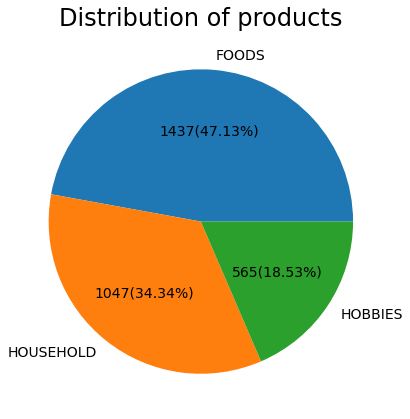

In [3]:
sub_categories=sales['cat_id'].value_counts()
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot()
ax.pie(x=sub_categories.values,
       labels=sub_categories.index,
       # 3049 -> 100%
       #  ?? --> p%
       autopct=lambda p: f'{p*sum(sub_categories.values/10)/100 :.0f}({p:.2f}%)',
       textprops={'fontsize': 14})
ax.set_title('Distribution of products',fontdict={'fontsize':24})
plt.show()

In [49]:
47.13*3049/100

1436.9937

## Observation
* Among 3049 unique products, around 47%(1437) of products falls under FOODS category , 34%(1047) falls under HOUSEHOLD category and leftover 18.5%(565) products are of HOBBIES category.

## 2.calendar.csv

In [14]:
cal = pd.read_csv('calendar.csv')
cal.head(10)

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1
5,2011-02-03,11101,Thursday,6,2,2011,d_6,NaN,NaN,NaN,NaN,1,1,1
6,2011-02-04,11101,Friday,7,2,2011,d_7,NaN,NaN,NaN,NaN,1,0,0
7,2011-02-05,11102,Saturday,1,2,2011,d_8,NaN,NaN,NaN,NaN,1,1,1
8,2011-02-06,11102,Sunday,2,2,2011,d_9,SuperBowl,Sporting,NaN,NaN,1,1,1
9,2011-02-07,11102,Monday,3,2,2011,d_10,NaN,NaN,NaN,NaN,1,1,0


## This dataframe contains details of each day , its weekday,month,year,event_name and about snap day details.

In [15]:
cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          1969 non-null   object
 1   wm_yr_wk      1969 non-null   int64 
 2   weekday       1969 non-null   object
 3   wday          1969 non-null   int64 
 4   month         1969 non-null   int64 
 5   year          1969 non-null   int64 
 6   d             1969 non-null   object
 7   event_name_1  162 non-null    object
 8   event_type_1  162 non-null    object
 9   event_name_2  5 non-null      object
 10  event_type_2  5 non-null      object
 11  snap_CA       1969 non-null   int64 
 12  snap_TX       1969 non-null   int64 
 13  snap_WI       1969 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 215.5+ KB


In [16]:
print("There are "+str(cal.isna().sum().sum())+" null/Nan values in the dataframe")

There are 7542 null/Nan values in the dataframe


## There are some nan values for the days which does not have the specified event name or event type.To overcome this replacing those nan values.

In [17]:
cal=cal.fillna('No_event')
cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          1969 non-null   object
 1   wm_yr_wk      1969 non-null   int64 
 2   weekday       1969 non-null   object
 3   wday          1969 non-null   int64 
 4   month         1969 non-null   int64 
 5   year          1969 non-null   int64 
 6   d             1969 non-null   object
 7   event_name_1  1969 non-null   object
 8   event_type_1  1969 non-null   object
 9   event_name_2  1969 non-null   object
 10  event_type_2  1969 non-null   object
 11  snap_CA       1969 non-null   int64 
 12  snap_TX       1969 non-null   int64 
 13  snap_WI       1969 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 215.5+ KB


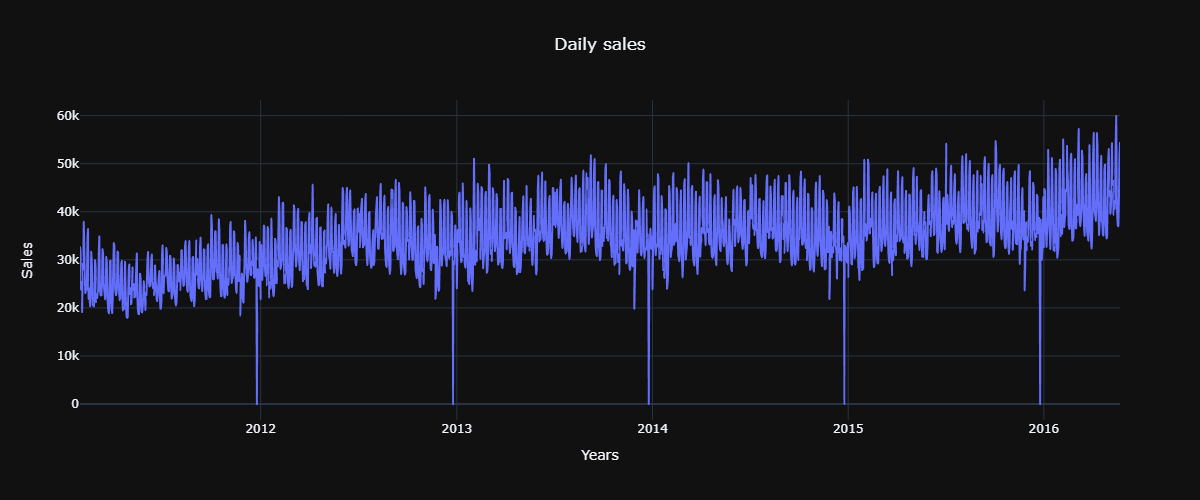

In [32]:
#https://plotly.com/python/figure-labels/
days_columns = [i for i in sales.columns if 'd_' in i]
days_sales = sales[days_columns] #taking only data which has has daily sales.
sales_day_wise = days_sales.sum() #summing up each day sales.
date=cal['date'][:1941] #As sales_train_evaluation file has data of 1941 days , we are taking date of those 1941 days.
fig = px.line(x=date, 
              y=sales_day_wise,
              labels={"x": "Years","y": "Sales"},
              title="Daily sales")
fig.update_layout(template="plotly_dark",title_x=0.5,width=1200,height=500)
#fig.show()
img_bytes = fig.to_image()
Image(img_bytes)

## Observation
* There is a smooth growth of sales. (upward trend)
* We can observe downfall of sales in december month of each year.
* We can find repeating seasonal patterns.

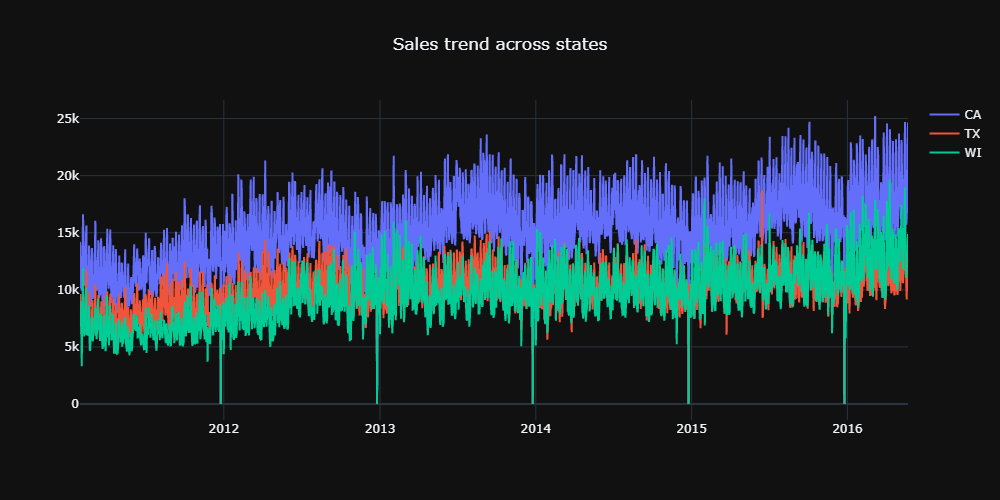

In [17]:
# https://plotly.com/python/time-series/
# https://stackoverflow.com/a/27277074
import plotly.graph_objects as go
days_columns = [i for i in sales.columns if 'd_' in i] #columns which has daily sales data
date=cal['date'][:1941] #As sales_train_evaluation file has data of 1941 days , we are taking date of those 1941 days.
state_wise_data=sales.groupby('state_id')[days_columns].sum()
#Now the generated dataframe contains d_1,d_2,....,d_1940,d_1941 as columns and CA,TX,WI as rows.
#For plotting we need to convert rows into columns and columns into rows. So performing transponse operation.
state_wise_data=state_wise_data.T
state_wise_data.index = list(date)
fig = go.Figure()
for i in state_wise_data.columns:
    fig.add_trace(go.Scatter(x=state_wise_data.index,y=state_wise_data[i],
                      mode='lines',
                      name=i))
fig.update_layout(template="plotly_dark",title='Sales trend across states ', title_x=0.5,width=1000,height=500)
#fig.show()
img_bytes = fig.to_image()
Image(img_bytes)

## Observation
* The sales rate is higher in stores located in state CA.
* The sales rate is overlapping for stores located in state TX and WI
* All the stores irrespective of state at which is located is experiencing sudden downfall sales in the month of december. 

In [130]:
days_columns = [i for i in sales.columns if 'd_' in i] #columns which has daily sales data
start_date=cal['date'][0]
end_date=cal['date'][1940]
    #Generating list of unique numbers for each of a tear e.g. days of first month of 2012 will have 201201
date_list = [(d.year*100)+d.month for d in pd.date_range(start = start_date, end = end_date)]
    

sales_df = sales.groupby(['state_id'])[days_columns].sum()

In [132]:
days_columns = [i for i in sales.columns if 'd_' in i] #columns which has daily sales data
start_date=cal['date'][0]
end_date=cal['date'][1940]
    #Generating list of unique numbers for each of a tear e.g. days of first month of 2012 will have 201201
date_list = [(d.year*100)+d.month for d in pd.date_range(start = start_date, end = end_date)]
    

sales_df = sales.groupby(['store_id'])[days_columns].sum()
sales_df=sales_df.T
sales_df['date'] = date_list
monthly_agg = sales_df.groupby('date').sum()


In [137]:
s=monthly_agg.sum().sort_values(ascending=False)
s.index

Index(['CA_3', 'CA_1', 'TX_2', 'WI_2', 'WI_3', 'TX_3', 'CA_2', 'TX_1', 'WI_1',
       'CA_4'],
      dtype='object', name='store_id')

In [143]:
def monthly_sales(column,title):
    '''This function plots the monthly sales of each year by grouping the sales based on the column passed.
      Parameters:
      1. column(str) : column name in the dataframe by which sales will be grouped
      2. title(str) : Title of the plot
     '''
    days_columns = [i for i in sales.columns if 'd_' in i] #columns which has daily sales data
    start_date=cal['date'][0]
    end_date=cal['date'][1940]
    #Generating list of unique numbers for each of a tear e.g. days of first month of 2012 will have 201201
    date_list = [(d.year*100)+d.month for d in pd.date_range(start = start_date, end = end_date)]
    

    sales_df = sales.groupby([column])[days_columns].sum()
    sales_df=sales_df.T
    sales_df['date'] = date_list
    monthly_agg = sales_df.groupby('date').sum()
    monthly=monthly_agg.sum().sort_values(ascending=False)

    monthly_dates = [d for d in pd.date_range(start = start_date, end = end_date, freq = 'MS')]
    fig = go.Figure()
    for i in monthly.index:
        fig.add_trace(go.Scatter(x=monthly_dates, y=monthly_agg[i],
                      mode='lines', name=i
                
                      ))
    fig.update_layout(template="plotly_dark",title=title, title_x=0.5,width=1000,height=500,xaxis_title="year",yaxis_title="sales")
    #fig.show()
    img_bytes = fig.to_image()
    return(Image(img_bytes))

In [139]:
print(monthly_sales.__doc__)

This function plots the monthly sales of each year by grouping the sales based on the column passed.
      Parameters:
      1. column(str) : column name in the dataframe by which sales will be grouped
      2. title(str) : Title of the plot
     


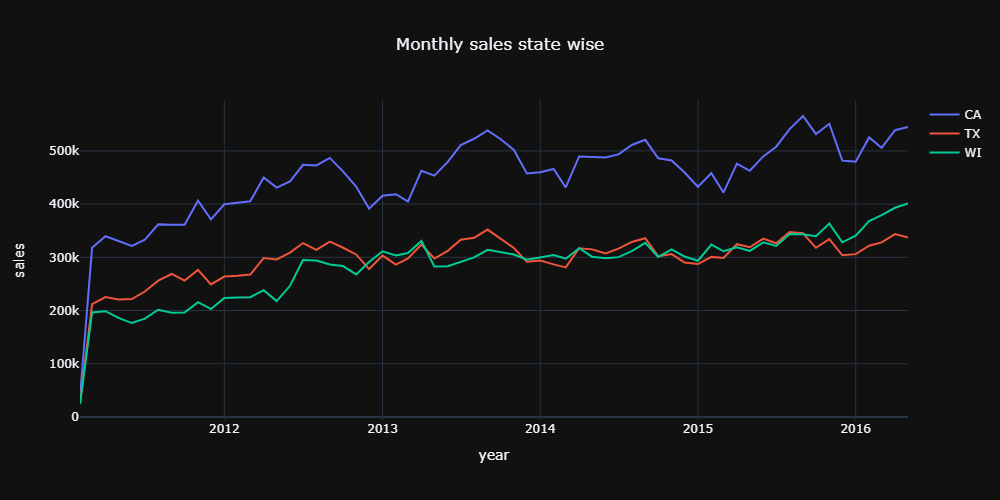

In [144]:
monthly_sales('state_id','Monthly sales state wise')

## Observation
* By observing the monthly sales of stores in 3 different states, we can clearly notice that stores located in CA is performing well having an upward trend.
* Untill October 2012, WI stores monthly sales was low compared to others . But after octaober 2012, the monthly sales has improved performing similar to TX stores.

In [156]:
def total_sales(title,column,xaxis,width=500,height=500):
    
    '''This function is used to plot the total sales of the specified category
    Parameters:
    1.title(str): Title of the plot
    2.column(str): Category by which sales are calculated.
    3.xaxis(str) : Label for x-axis
    4.width(int) : width of the plot, by default 500 is passed
    5.height(int) : height of the plot, by default 500 is passed
    '''
    days_columns = [i for i in sales.columns if 'd_' in i] #columns which has daily sales data
    n_sold_products1=sales.groupby(column)[days_columns].sum()
    n_sold_products1=n_sold_products1.T.sum().sort_values(ascending=False)
    percentage = [str(np.round(i/n_sold_products1.sum()*100, 2))+'%' for i in n_sold_products1.values]
    fig=px.bar( x=n_sold_products1.index,y=n_sold_products1.values,color=n_sold_products1.index,text=percentage,
            labels={'x':xaxis,"y":'Count of sold products'}  
        )
    fig.update_traces(textposition='outside')
    fig.update_layout(template="plotly_dark",showlegend=False, title=title, title_x=0.5,width=width, height=height)
    #fig.show()
    img_bytes = fig.to_image()
    return(Image(img_bytes))

In [148]:
print(total_sales.__doc__)

This function is used to plot the total sales of the specified category
    Parameters:
    1.title(str): Title of the plot
    2.column(str): Category by which sales are calculated.
    3.xaxis(str) : Label for x-axis
    4.width(int) : width of the plot, by default 500 is passed
    5.height(int) : height of the plot, by default 500 is passed
    


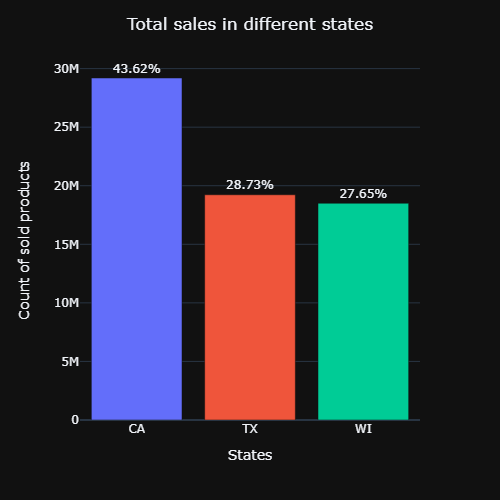

In [157]:
total_sales("Total sales in different states",'state_id','States')

## Observation
* We can clearly observe CA has the highest sales acheiving the 43.6% of the total sales.(29.1 million)
* WI has sales of around 18.5 million which is the least comparitvely.

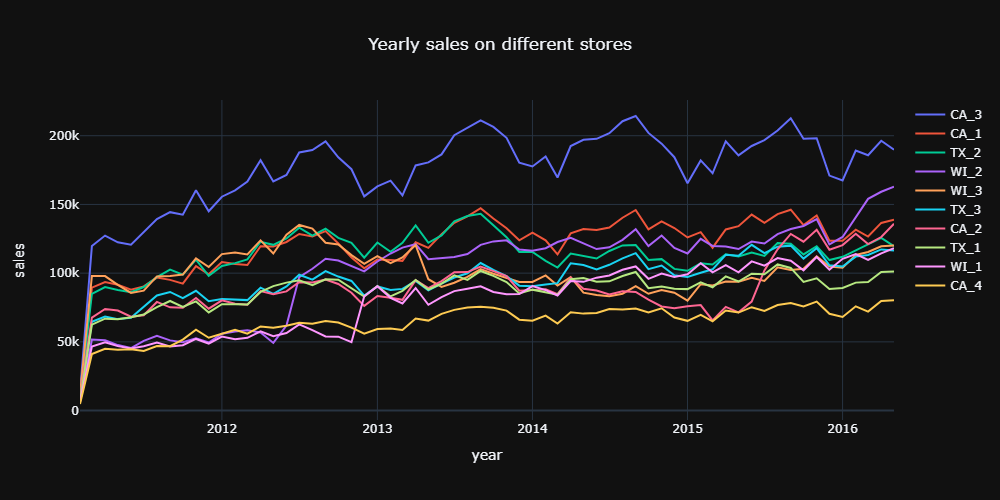

In [150]:
monthly_sales('store_id','Yearly sales on different stores')

## Observation
* CA_3 store is performing well in sales maintaining upward trend.
* CA_4 store sales is low when compared to other stores.
* From 2015,WI_2 store sales has improved alot and from 2016 the sales has drastically increased.
* CA_2 also found its improvement in sales from mid of 2015.
* TX_2 store sales was going well till september 2013 and experienced sudden downfall of sales for next 6 months.Afterwrds improving gradually.

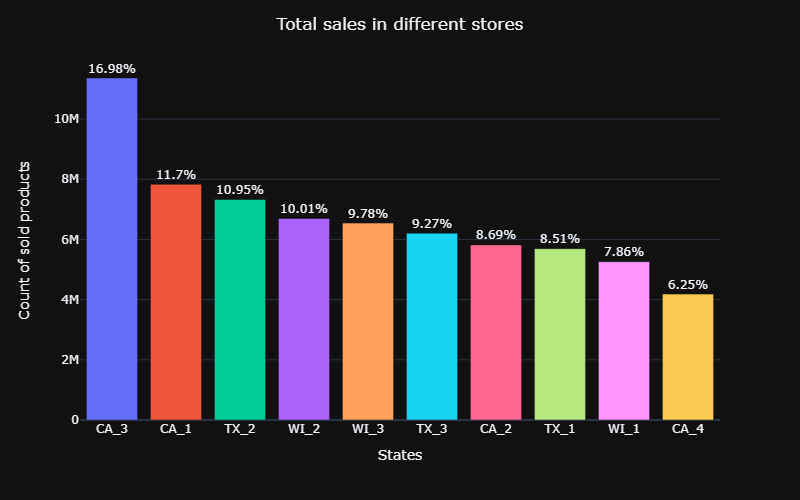

In [158]:
total_sales("Total sales in different stores",'store_id','States',800)

## Observation
* CA_3 store sales is highest with 11.3 million sales overall.
* WI_2 and WI_3 have reasonabally good amount of sales eventhough WI has less population.
* CA_4 has the least sales with 4.1 million.

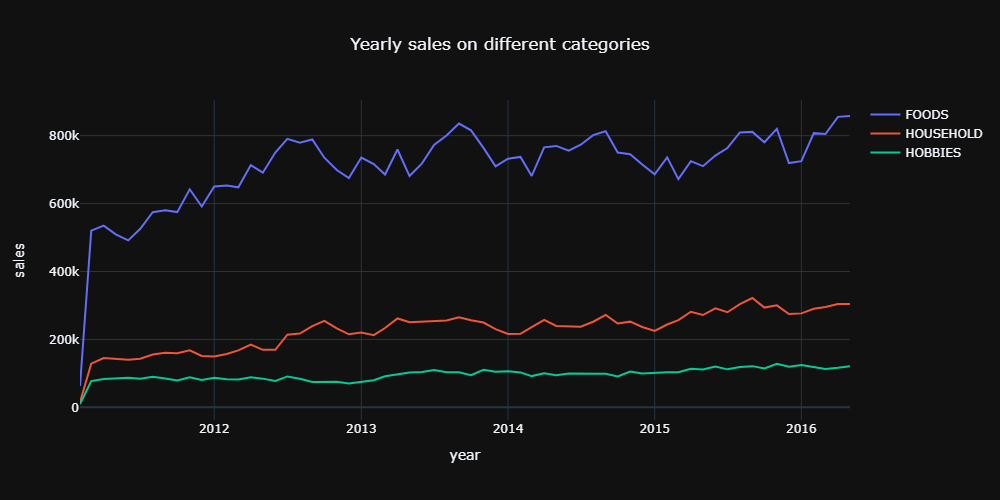

In [152]:
monthly_sales('cat_id','Yearly sales on different categories')

## Observation
* It is clear that FOOD products are of highest demand with gradual increase in sales over the years.

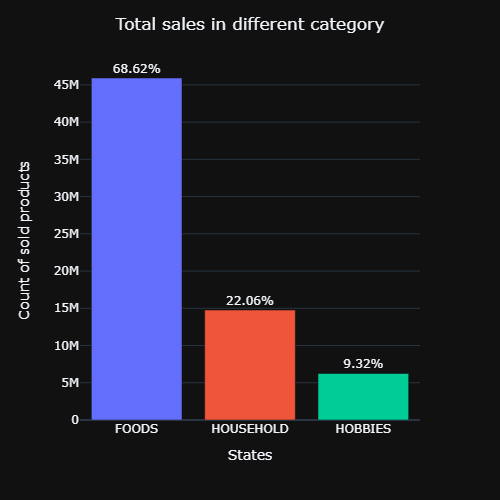

In [159]:
total_sales("Total sales in different category",'cat_id','States')

## Obseravtion
* Around 68 percent of the sales are from the FOODS products. 
* By this plot we can tell FOODS category has the highest demand among other catogories.
* Products of category HOBBIES has the least percentage of sales(i.e around 9%)

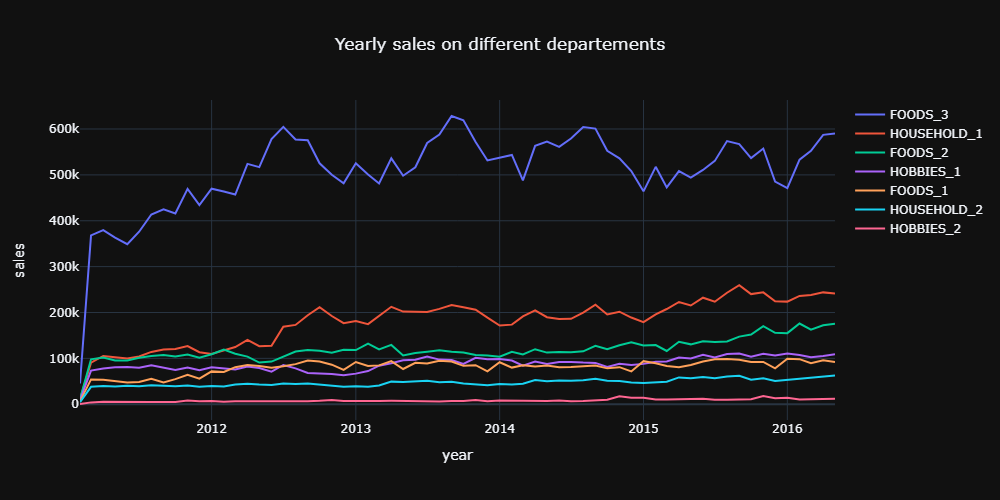

In [154]:
monthly_sales('dept_id','Yearly sales on different departements')

## Observation
* FOOD_3 departement products stands out be the highest on demand product deprtement with upward trend of sales and having repeating seasonality.
* From june 2012, HOUSEHOLD_1 has increased its sales having a slight upward trend.
* HOBBIES_2 sales are almost constant and no fluctuations.

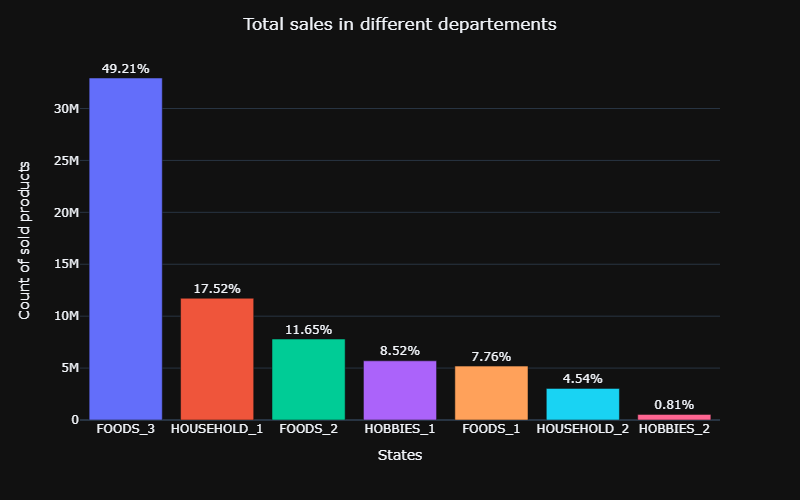

In [160]:
total_sales("Total sales in different departements",'dept_id','States',800)

## Observation
* Products of departement FOODS_3 holds around 49% of the total sales with 32.9 million products sold.
* Products of departement HOUSEHOLD_1 is the second highest product departement on demand with 11.7 million products sold.
* HOBBIES_2 departement products were least sold with a total sales of 0.5 million.

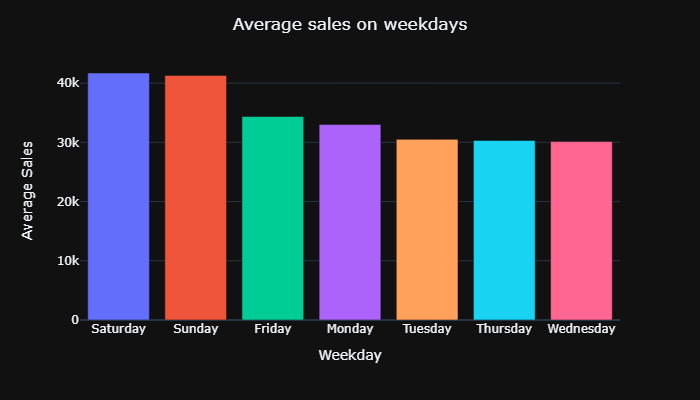

<Figure size 720x504 with 0 Axes>

In [31]:
weekday=cal['weekday'].iloc[:1941]
sales1=sales[days_columns].sum()
weekday_sales = pd.DataFrame()
weekday_sales['weekday'] = list(weekday)
weekday_sales['sales'] = list(sales1)
weekday_sales=weekday_sales.groupby('weekday').mean().T.mean().sort_values(ascending=False)
fig = plt.figure(figsize=(10, 7))
fig=px.bar( x=weekday_sales.index,y=weekday_sales.values,color=weekday_sales.index,
           labels={'x':"Weekday","y":'Average Sales'}  
       )
fig.update_layout(template="plotly_dark",showlegend=False, title="Average sales on weekdays", title_x=0.5,width=700, height=400)
#fig.show()
img_bytes = fig.to_image()
Image(img_bytes)

## Observation
* Looking at the average sales , we can clearly notice that average sales on saturday and sunday are high compared to other days with an average sales of around 41.7k.
* Sales are high on weekends.
* The days before and afer weekend(i.e Monday and friday) we can observe slight rise is sales.

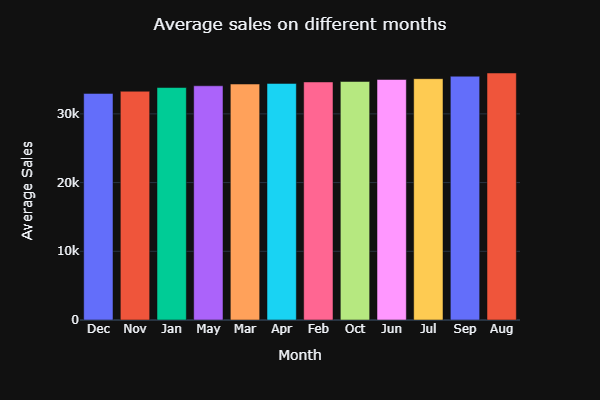

<Figure size 720x504 with 0 Axes>

In [32]:
month = {1:"Jan",2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
month_data=cal['month'].iloc[:1941].map(month)

sales1=sales[days_columns].sum()
weekday_sales = pd.DataFrame()
weekday_sales['weekday'] = list(month_data)
weekday_sales['sales'] = list(sales1)
weekday_sales=weekday_sales.groupby('weekday').mean().T.mean().sort_values()
fig = plt.figure(figsize=(10, 7))
fig=px.bar( x=weekday_sales.index,y=weekday_sales.values,color=weekday_sales.index,
           labels={'x':"Month","y":'Average Sales'}  
       )
fig.update_layout(template="plotly_dark",showlegend=False, title="Average sales on different months", title_x=0.5,width=600, height=400)
#fig.show()
img_bytes = fig.to_image()
Image(img_bytes)

## Observation
* Sales in the month of August has the highest sales with average of around 36k.
* December month has the least sales with average sales of 32.9k.
* Usually year end months(i.e Nov and Dec),the sales has been decreased.
* The sales has improved gradually from the month of febrauary. 

In [33]:
def avg_sales_event(event,title,width=600,height=500):
    '''
    This function is used to plot the average sales on this basis of event type passed.
    Parameters:
    1.category(str) : name of the category by which average sales are calculated.
    2.title(str): Title of the plot.
    3.width(int) : width of the plot, by default 600 is passed.
    4.height(int) : height of the plot, by default 500 is passed.
    '''
    
    c = pd.DataFrame(sales[days_columns].sum())
    d = cal[[event,'d']]
    temp = c.merge(d,left_index=True, right_on='d')
    temp.set_index('d', inplace=True)
    temp = temp.groupby(event).mean().T.mean().sort_values(ascending=False)
    y = [str(np.round(i/temp.sum()*100, 2))+'%' for i in temp.values]

    fig = px.bar(x=temp.index, y=temp.values, labels={'x':"Events","y":'Percent Sales'}, color=temp.index,text=temp.astype(int))
    fig.update_traces(textposition='outside')
    fig.update_layout(template="plotly_dark",showlegend=False, title=title, title_x=0.5, width=width, height=height)
    #fig.show()
    img_bytes = fig.to_image(format="png")
    return Image(img_bytes)

In [34]:
print(avg_sales_event.__doc__)


    This function is used to plot the average sales on this basis of event type passed.
    Parameters:
    1.category(str) : name of the category by which average sales are calculated.
    2.title(str): Title of the plot.
    3.width(int) : width of the plot, by default 600 is passed.
    4.height(int) : height of the plot, by default 500 is passed.
    


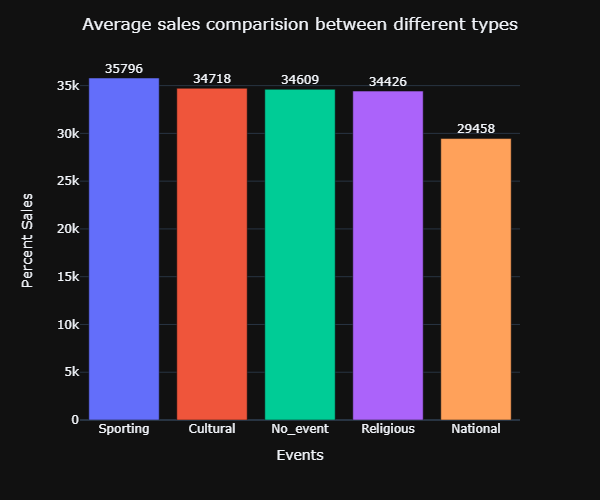

In [35]:
avg_sales_event('event_type_1','Average sales comparision between different types')

## Observation
* Average sales on day with sporting event is slightly higher than other days.
* Days with national event is least with average sales of 29.4k.
* Average sales on non event days are slightly more than days with events except Sporting event. 

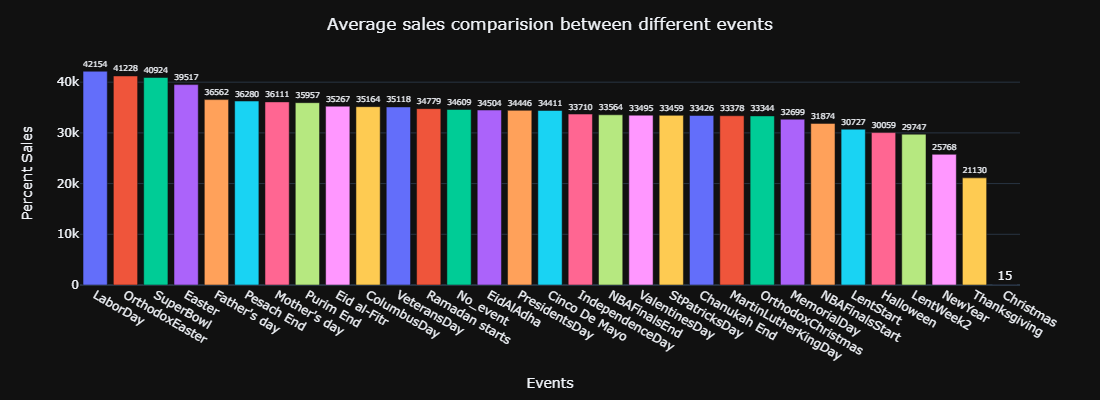

In [36]:
avg_sales_event('event_name_1','Average sales comparision between different events',1100,400)

## Observation
* Average sales on labour day is highest with 42154.
* Sales on christmas is very low with average sales of 15.

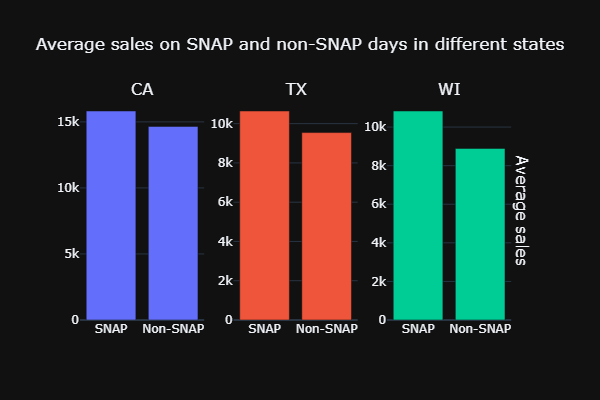

In [37]:
sCA=cal['snap_CA'][:1941]
sTX=cal['snap_TX'][:1941]
sWI=cal['snap_WI'][:1941]

sales_CA = sales[sales['state_id']=='CA'][days_columns].sum()
sales_TX =sales[sales['state_id']=='TX'][days_columns].sum()
sales_WI =sales[sales['state_id']=='WI'][days_columns].sum()

#sales1=sales[days_coloumns].sum()
CA_sales = pd.DataFrame()
CA_sales['is_snap'] = list(sCA)
CA_sales['sales'] = list(sales_CA)
CA_sales['is_snap']=CA_sales['is_snap'].replace([0,1],['Non-SNAP','SNAP'])
CA_sales=CA_sales.groupby('is_snap').mean().T.mean().sort_values(ascending=False)

TX_sales = pd.DataFrame()
TX_sales['is_snap'] = list(sTX)
TX_sales['sales'] = list(sales_TX)
TX_sales['is_snap']=TX_sales['is_snap'].replace([0,1],['Non-SNAP','SNAP'])
TX_sales=TX_sales.groupby('is_snap').mean().T.mean().sort_values(ascending=False)

WI_sales = pd.DataFrame()
WI_sales['is_snap'] = list(sWI)
WI_sales['sales'] = list(sales_WI)
WI_sales['is_snap']=WI_sales['is_snap'].replace([0,1],['Non-SNAP','SNAP'])
WI_sales=WI_sales.groupby('is_snap').mean().T.mean().sort_values(ascending=False)


fig = make_subplots(rows=1, cols=3,subplot_titles=["CA",'TX','WI'],row_titles=['Average sales'])
fig.add_trace(go.Bar(x=CA_sales.index, y=CA_sales.values),1,1)
fig.add_trace(go.Bar(x=TX_sales.index, y=TX_sales.values),1,2)
fig.add_trace(go.Bar(x=WI_sales.index, y=WI_sales.values),1,3)

fig.update_layout(template="plotly_dark", title="Average sales on SNAP and non-SNAP days in different states",showlegend=False, title_x=0.5,width=600, height=400)
#fig.show()
img_bytes = fig.to_image()
Image(img_bytes)

## Observation
* We can clearly observe that the average sales on SNAP day is slightly higher than that of non-SNAP day irrespective of the states.

## 3. sell_prices.csv

In [9]:
#Displaying first 5 rows of the sell_prices.csv
prices = pd.read_csv('sell_prices.csv')
prices.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26



## This dataframe contains the weekly selling price details of each item in different stores.

In [39]:
print("There are "+str(prices.isna().sum().sum())+" null/Nan values in the dataframe")

There are 0 null/Nan values in the dataframe


In [40]:
def weekly_SP(item,store):
    '''
    This function is used to generate the dataframe which has selling price of the specified product data in the specified store and week numbers as columns.
    Parameters:
    1.item(str)= item_id
    2.store(str) = store_id
    '''
    df=prices[prices['item_id']==item]
    df1=df[df['store_id']==store]
    df1['wm_yr_wk1'] = np.arange(1,df1.shape[0]+1) #Starting the week number from 1
    return df1

In [41]:
print(weekly_SP.__doc__)


    This function is used to generate the dataframe which has selling price of the specified product data in the specified store and week numbers as columns.
    Parameters:
    1.item(str)= item_id
    2.store(str) = store_id
    


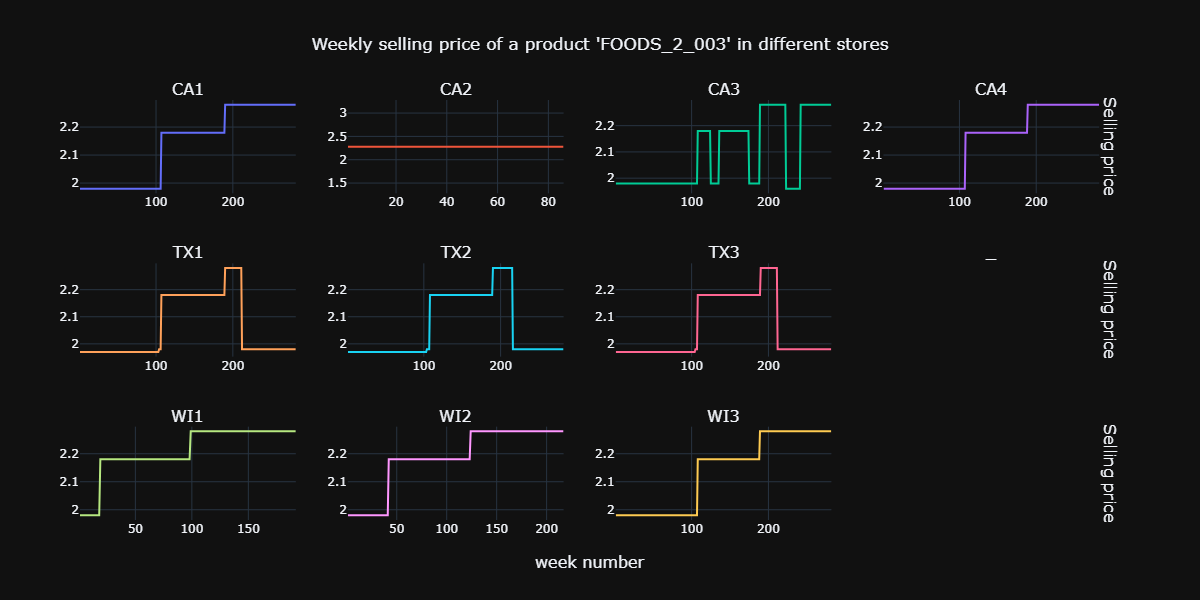

In [42]:
item_name = 'FOODS_2_003'
c1=weekly_SP(item_name,'CA_1')
c2 =weekly_SP(item_name,'CA_2')
c3=weekly_SP(item_name,'CA_3')
c4= weekly_SP(item_name,'CA_4')
t1= weekly_SP(item_name,'TX_1')
t2= weekly_SP(item_name,'TX_2')
t3= weekly_SP(item_name,'TX_3')
w1= weekly_SP(item_name,'WI_1')
w2= weekly_SP(item_name,'WI_2')
w3= weekly_SP(item_name,'WI_3')


fig = go.Figure()
fig = make_subplots(rows=3, cols=4,subplot_titles=["CA1",'CA2','CA3','CA4','TX1','TX2','TX3','_','WI1','WI2','WI3'],x_title='week number',row_titles=['Selling price','Selling price','Selling price'])
fig.add_trace(go.Scatter(x=c1['wm_yr_wk1'], y=c1['sell_price'],mode='lines'),1,1)
fig.add_trace(go.Scatter(x=c2['wm_yr_wk1'], y=c2['sell_price'],mode='lines'),1,2)
fig.add_trace(go.Scatter(x=c3['wm_yr_wk1'], y=c3['sell_price'],mode='lines'),1,3)
fig.add_trace(go.Scatter(x=c4['wm_yr_wk1'], y=c4['sell_price'],mode='lines'),1,4)

fig.add_trace(go.Scatter(x=t1['wm_yr_wk1'], y=t1['sell_price'],mode='lines'),2,1)
fig.add_trace(go.Scatter(x=t2['wm_yr_wk1'], y=t2['sell_price'],mode='lines'),2,2)
fig.add_trace(go.Scatter(x=t3['wm_yr_wk1'], y=t3['sell_price'],mode='lines'),2,3)

fig.add_trace(go.Scatter(x=w1['wm_yr_wk1'], y=w1['sell_price'],mode='lines'),3,1)
fig.add_trace(go.Scatter(x=w2['wm_yr_wk1'], y=w2['sell_price'],mode='lines'),3,2)
fig.add_trace(go.Scatter(x=w3['wm_yr_wk1'], y=w3['sell_price'],mode='lines'),3,3)

fig.update_layout(template="plotly_dark",title="Weekly selling price of a product 'FOODS_2_003' in different stores",title_x=0.5,width=1200, height=600,showlegend=False)
#fig.show()
img_bytes = fig.to_image()
Image(img_bytes)

## Observation
* For the product 'FOODS_2_003' the stores in TX state has the same price for a particular week.
* Price in store 'CA_2' is constant and available for only 85 weeks.
* We can find fluctuation of price in store 'CA_3'.
* The product is available for 280 weeks for most of the stores except some.(CA_2:85 weeks and WI_1:190 weeks)

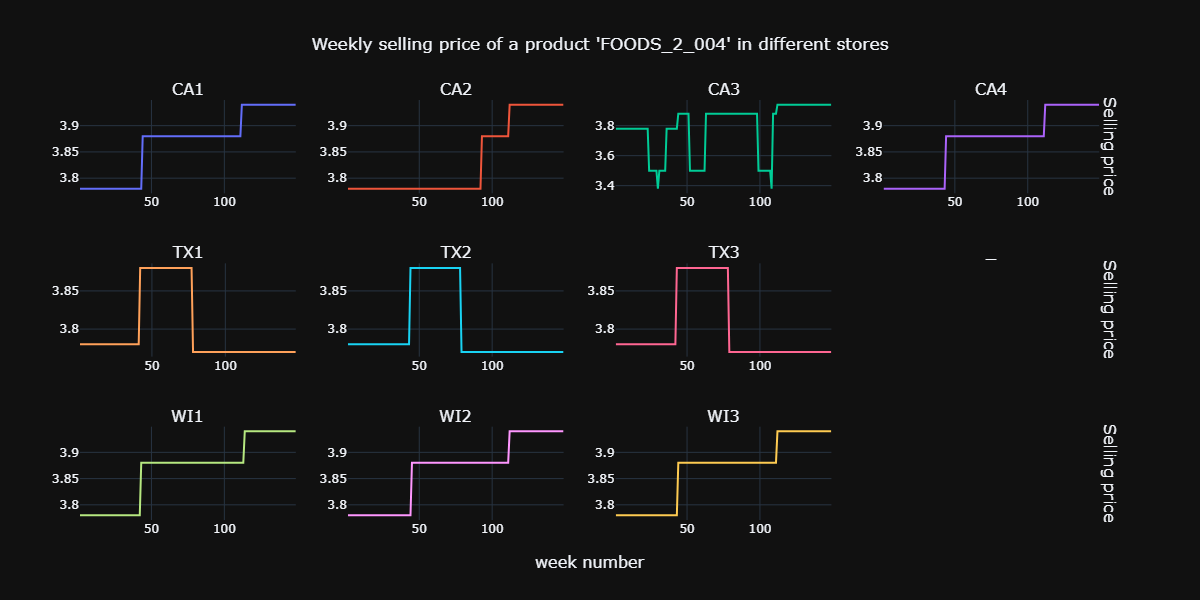

In [43]:
#'FOODS_2_003'

item_name = 'FOODS_2_004'
c1=weekly_SP(item_name,'CA_1')
c2 =weekly_SP(item_name,'CA_2')
c3=weekly_SP(item_name,'CA_3')
c4= weekly_SP(item_name,'CA_4')
t1= weekly_SP(item_name,'TX_1')
t2= weekly_SP(item_name,'TX_2')
t3= weekly_SP(item_name,'TX_3')
w1= weekly_SP(item_name,'WI_1')
w2= weekly_SP(item_name,'WI_2')
w3= weekly_SP(item_name,'WI_3')


fig = go.Figure()
fig = make_subplots(rows=3, cols=4,subplot_titles=["CA1",'CA2','CA3','CA4','TX1','TX2','TX3','_','WI1','WI2','WI3'],x_title='week number',row_titles=['Selling price','Selling price','Selling price'])
fig.add_trace(go.Scatter(x=c1['wm_yr_wk1'], y=c1['sell_price'],mode='lines'),1,1)
fig.add_trace(go.Scatter(x=c2['wm_yr_wk1'], y=c2['sell_price'],mode='lines'),1,2)
fig.add_trace(go.Scatter(x=c3['wm_yr_wk1'], y=c3['sell_price'],mode='lines'),1,3)
fig.add_trace(go.Scatter(x=c4['wm_yr_wk1'], y=c4['sell_price'],mode='lines'),1,4)

fig.add_trace(go.Scatter(x=t1['wm_yr_wk1'], y=t1['sell_price'],mode='lines'),2,1)
fig.add_trace(go.Scatter(x=t2['wm_yr_wk1'], y=t2['sell_price'],mode='lines'),2,2)
fig.add_trace(go.Scatter(x=t3['wm_yr_wk1'], y=t3['sell_price'],mode='lines'),2,3)

fig.add_trace(go.Scatter(x=w1['wm_yr_wk1'], y=w1['sell_price'],mode='lines'),3,1)
fig.add_trace(go.Scatter(x=w2['wm_yr_wk1'], y=w2['sell_price'],mode='lines'),3,2)
fig.add_trace(go.Scatter(x=w3['wm_yr_wk1'], y=w3['sell_price'],mode='lines'),3,3)

fig.update_layout(template="plotly_dark",title="Weekly selling price of a product 'FOODS_2_004' in different stores",title_x=0.5,width=1200, height=600,showlegend=False)
#fig.show()
img_bytes = fig.to_image()
Image(img_bytes)

## Observation
* For the product 'FOODS_2_003' the stores in states WI and TX has the same price for a particular week.
* The product available is 150 weeks across all the stores.
* We can find fluctuation of price in store 'CA_3'

## Observation after comparing weekly selling price of 2 products of FOOD_2 departement.
*  We can clearly notice that selling price is not constant.
* Selling price differs in some weeks for different stores.(There is a fixed price)
* Fluctuation of sales in CA_3.
* Usually the prices are similar for stores in CA_1 and CA_2.
* Usually the prices are similar for stores in stores located in TX.

* We can find no change in selling price from past 25 weeks.

# Product Demand Plot

In [4]:
def demand(df,title):
    days_columns = [i for i in sales.columns if 'd_' in i]
    sa = df
    df = sa[days_columns]
    df=df.sum(axis=1)
    df1 = pd.DataFrame()
    df1['sales']=df
    df1['item'] = list(sa['item_id'])
    df1=df1.groupby('item').sum()
    df2=df1.sort_values('sales',ascending=False)
    fig = make_subplots(rows=2, cols=1,subplot_titles=['TOP 20 ON DEMAND ITEMS','LEAST 20 ON DEMAND ITEMS'])
    fig.add_trace(go.Bar(x=df2.index[:50], y=df2['sales'][:20]),1,1)
    fig.add_trace(go.Bar(x=df2.index[-50:], y=df2['sales'][-20:]),2,1)

    fig.update_layout(template="plotly_dark", title=title,showlegend=False, title_x=0.5,width=700, height=800)
    #fig.show()
    img_bytes = fig.to_image() 
    categories=['FOODS','HOUSEHOLD','HOBBIES']
    
    for c in categories:
        for i,j in enumerate(df2.index,1):
            if c in str(j):
                print("Among "+c+ " category,item with id "+str(j)+" is the highest sold item with "+str(df2['sales'].iloc[i-1]/1000)+ "k sales (Overall:TOP "+str(i)+") ")
                break
    return(Image(img_bytes))

Among FOODS category,item with id FOODS_3_090 is the highest sold item with 1017.916k sales (Overall:TOP 1) 
Among HOUSEHOLD category,item with id HOUSEHOLD_1_334 is the highest sold item with 174.036k sales (Overall:TOP 39) 
Among HOBBIES category,item with id HOBBIES_1_371 is the highest sold item with 124.086k sales (Overall:TOP 79) 


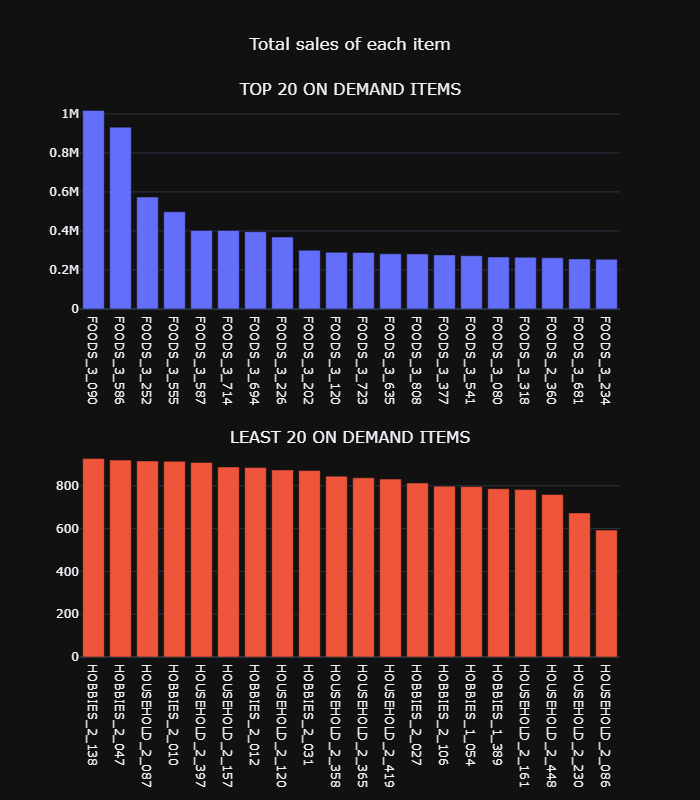

In [5]:
demand(sales,"Total sales of each item")

## Observation
* FOODS_3_090 product has the highest demand among 3049 products with a total sales of 1.0179M sales.
* Second highest on demand product is FOODS_3_586 with a total sales of 932k sales.
* HOUSEHOLD_2_101 product is the product with least total sales of 593.

Among FOODS category,item with id FOODS_3_090 is the highest sold item with 493.312k sales (Overall:TOP 1) 
Among HOUSEHOLD category,item with id HOUSEHOLD_1_118 is the highest sold item with 70.55k sales (Overall:TOP 42) 
Among HOBBIES category,item with id HOBBIES_1_371 is the highest sold item with 67.956k sales (Overall:TOP 45) 


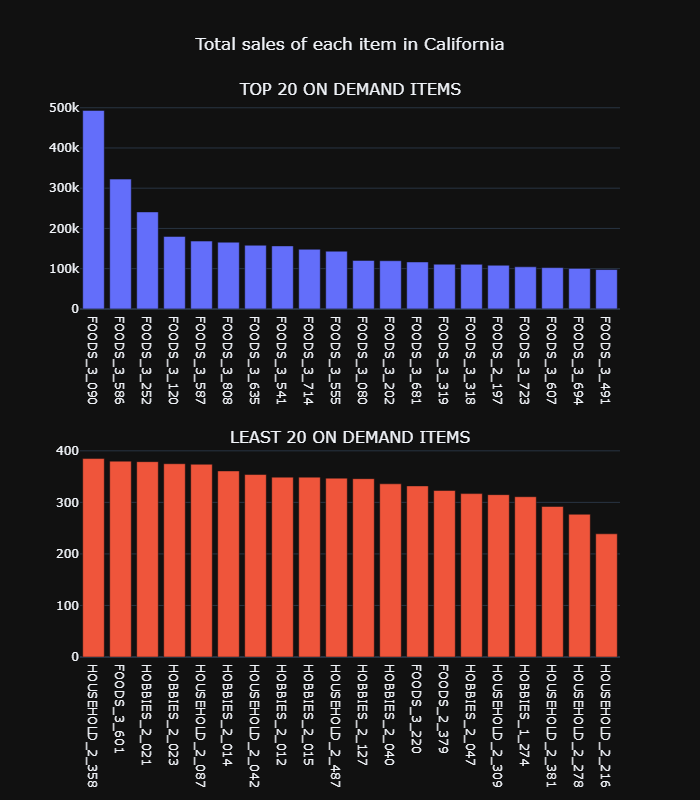

In [6]:
sales_CA=sales[sales['state_id']=='CA']
demand(sales_CA,"Total sales of each item in California")

## Observation on plot for product demand in california
* FOODS_3_090 product has the highest demand among 3049 products with a total sales of 493k sales.
* Second highest on demand product is FOODS_3_586 with a total sales of 322.5k sales.
* HOBBIES_1_052 product is the product with least total sales of 239.

Among FOODS category,item with id FOODS_3_586 is the highest sold item with 460.992k sales (Overall:TOP 1) 
Among HOUSEHOLD category,item with id HOUSEHOLD_1_521 is the highest sold item with 62.459k sales (Overall:TOP 28) 
Among HOBBIES category,item with id HOBBIES_1_371 is the highest sold item with 26.85k sales (Overall:TOP 128) 


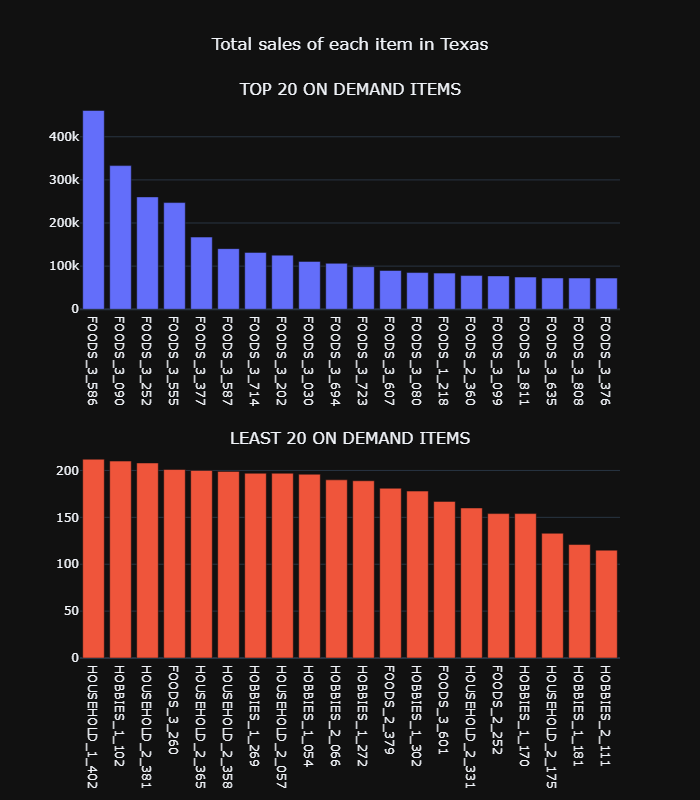

In [8]:
sales_TX=sales[sales['state_id']=='TX']
demand(sales_TX,"Total sales of each item in Texas")

## Observation on plot for product demand in Texas
* FOODS_3_586 product has the highest demand among 3049 products with a total sales of 461k sales.
* Second highest on demand product is FOODS_3_90 with a total sales of 333.9k sales.
* HOUSEHOLD_2_101 product is the product with least total sales of 115.

Among FOODS category,item with id FOODS_3_226 is the highest sold item with 250.707k sales (Overall:TOP 1) 
Among HOUSEHOLD category,item with id HOUSEHOLD_1_459 is the highest sold item with 57.853k sales (Overall:TOP 29) 
Among HOBBIES category,item with id HOBBIES_1_371 is the highest sold item with 29.28k sales (Overall:TOP 105) 


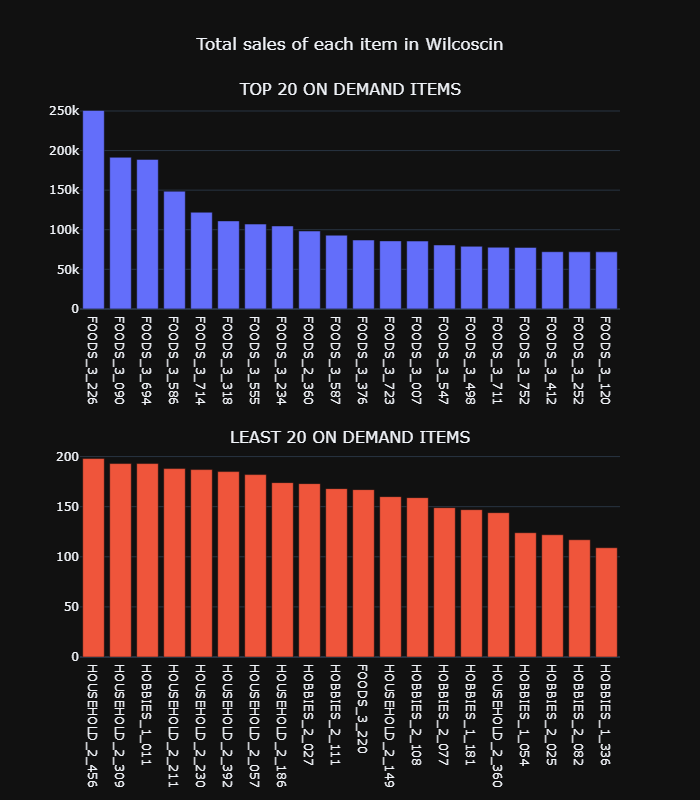

In [9]:
sales_WI=sales[sales['state_id']=='WI']
demand(sales_WI,"Total sales of each item in Wilcoscin")

## Observation on plot for product demand in Wilcoscin
* FOODS_3_226 product has the highest demand among 3049 products with a total sales of 250.7k sales.
* Second highest on demand product is FOODS_3_90 with a total sales of 191.5k sales.
* HOUSEHOLD_2_130 product is the product with least total sales of 109.

## Heat Map

<AxesSubplot:>

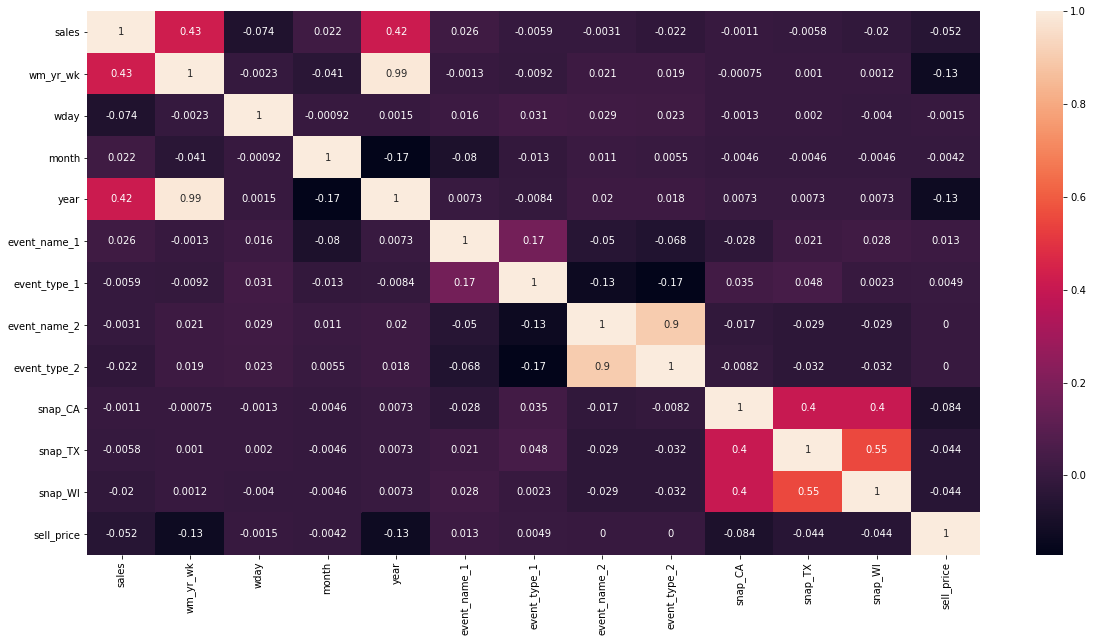

In [10]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()

s1=sales[sales['id']=='HOBBIES_1_001_CA_1_evaluation']
data = pd.melt(s1, id_vars=['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'],
          var_name='day', value_name='sales').dropna()
data = data.merge(cal, left_on='day', right_on='d')

data = data.merge(prices,on=['store_id','item_id', 'wm_yr_wk'], how='left')

cat_features = ['event_type_1','event_name_1','event_name_2','event_type_2']
#label encoding categorical features.
for i in cat_features:
    data[i]=label_encoder.fit_transform(data[i])
fig, ax = plt.subplots(figsize=(20,10))  
sns.heatmap(data.corr(),annot=True,ax=ax)

## Observation
* We can observe that 'wm_yr_wk' and 'year' are the most prominent features contributing fore sales.
* 'month' feature is also having positive corelation of 0.022.

## Total monthly sales of each year

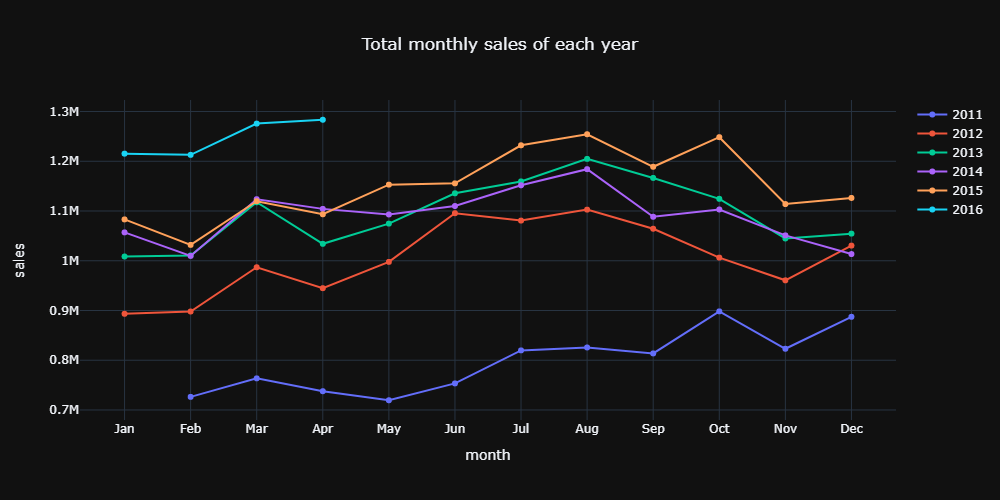

In [51]:
month = {1:"Jan",2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
sales_df = sales[days_columns].sum()
df = pd.DataFrame()

#The dataframe does not contain whole month data for couple of months.They are 
#1.first month of 2011(Janauary) : contains only sales of date 29,30 and 31(only 3 days data)
#2.fifth month of 2016(May) : contains only sales of date from 1 to 22 (only 22 days data)
# For plotting we excluded these month data . So slicing the dataframe with starting position 3 and ending position 1919

df['sales'] = sales_df[3:1919]
df['month'] = list(cal['month'][3:1919])
df['year'] = list(cal['year'][3:1919])
df1=df.groupby(['month','year'])['sales'].sum().unstack()
df1.index=df1.index.map(month)

fig = go.Figure()
for i in df1.columns:
    fig.add_trace(go.Scatter(x=df1.index, y=df1[i],
                    mode='lines+markers',
                    name=i))
fig.update_layout(template="plotly_dark",title='Total monthly sales of each year', title_x=0.5,width=1000,height=500,xaxis_title="month",yaxis_title="sales")
#fig.show()
img_bytes = fig.to_image()
Image(img_bytes)

## Observation
* Usually monthly sales incresed every year.
* If we compare 2013 and 2014 year monthly sales, 2014 monthly sales have dropped slightly.